In [23]:
# ============================================
# Section 2.1 – DATASET DESCRIPTION AND ANALYSIS
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 100)
plt.style.use('seaborn-v0_8-whitegrid')

# Load the Ames Housing dataset
df = pd.read_csv("AmesHousing.csv")

print("Dataset shape:", df.shape)
df.head()

Dataset shape: (2930, 82)


Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0   NaN       IR1          Lvl    AllPub     Corner        Gtl        NAmes   
1   NaN       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
2   NaN       IR1          Lvl    AllPub     Corner        Gtl        NAmes   
3   NaN       Reg          Lvl    AllPub     Corner        Gtl        NAmes   
4   NaN       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        Norm        Norm      1Fam      1Story             6             5   
1       Feedr        Norm      1Fam      1Story             5             6   
2        Norm        Norm      1Fam      1Story             6             6   
3        Norm        Norm      1Fam      1Story             7             5   
4        Norm        Norm      1Fam      2Story             5             5   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1960            1960        Hip   CompShg      BrkFace      Plywood   
1        1961            1961      Gable   CompShg      VinylSd      VinylSd   
2        1958            1958        Hip   CompShg      Wd Sdng      Wd Sdng   
3        1968            1968        Hip   CompShg      BrkFace      BrkFace   
4        1997            1998      Gable   CompShg      VinylSd      VinylSd   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0        Stone         112.0         TA         TA     CBlock        TA   
1          NaN           0.0         TA         TA     CBlock        TA   
2      BrkFace         108.0         TA         TA     CBlock        TA   
3          NaN           0.0         Gd         TA     CBlock        TA   
4          NaN           0.0         TA         TA      PConc        Gd   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        Gd            Gd            BLQ         639.0            Unf   
1        TA            No            Rec         468.0            LwQ   
2        TA            No            ALQ         923.0            Unf   
3        TA            No            ALQ        1065.0            Unf   
4        TA            No            GLQ         791.0            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0           0.0        441.0         1080.0    GasA         Fa           Y   
1         144.0        270.0          882.0    GasA         TA           Y   
2           0.0        406.0         1329.0    GasA         TA           Y   
3           0.0       1045.0         2110.0    GasA         Ex           Y   
4           0.0        137.0          928.0    GasA         Gd           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      SBrkr        1656           0                0         1656   
1      SBrkr         896           0                0          896   
2      SBrkr        1329           0                0         1329   
3      SBrkr        2110           0                0         2110   
4      SBrkr         928         701                0         1629   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0             1.0             0.0          1          0              3   
1             0.0             0.0          1          0              2   
2             0.0             0.0          1          1              3   
3             1.0             0.0

In [24]:
# Overview of data types and missing values
print("\n--- Data Info ---")
df.info()

print("\n--- Missing Values ---")
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing.head(10)


--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 


Pool QC          2917
Misc Feature     2824
Alley            2732
Fence            2358
Mas Vnr Type     1775
Fireplace Qu     1422
Lot Frontage      490
Garage Cond       159
Garage Qual       159
Garage Finish     159
dtype: int64

In [25]:
# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

print(f"Numeric features: {len(numeric_cols)}")
print(f"Categorical features: {len(categorical_cols)}")

Numeric features: 39
Categorical features: 43



Target Summary:
count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64


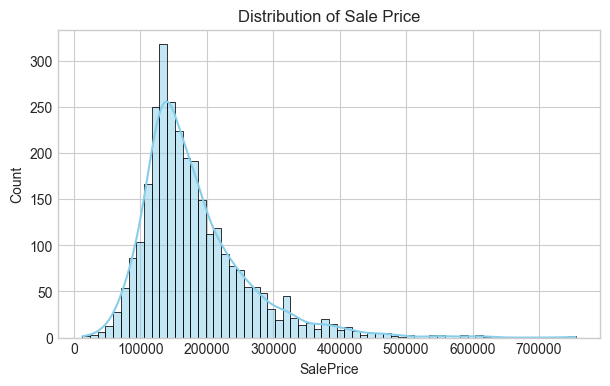

Skewness: 1.7435000757376466


In [26]:
target = "SalePrice"
print("\nTarget Summary:")
print(df[target].describe())

plt.figure(figsize=(7,4))
sns.histplot(df[target], kde=True, color='skyblue')
plt.title("Distribution of Sale Price")
plt.show()

print("Skewness:", df[target].skew())


Top 10 Correlated Features with SalePrice:
SalePrice         1.000000
Overall Qual      0.799262
Gr Liv Area       0.706780
Garage Cars       0.647877
Garage Area       0.640401
Total Bsmt SF     0.632280
1st Flr SF        0.621676
Year Built        0.558426
Full Bath         0.545604
Year Remod/Add    0.532974
Name: SalePrice, dtype: float64


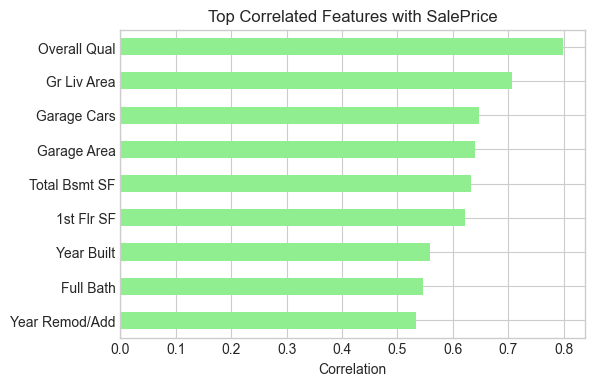

In [27]:
corr = df.corr(numeric_only=True)[target].sort_values(ascending=False)
print("\nTop 10 Correlated Features with SalePrice:")
print(corr.head(10))

plt.figure(figsize=(6,4))
corr.head(10).drop(target).plot(kind='barh', color='lightgreen')
plt.title("Top Correlated Features with SalePrice")
plt.xlabel("Correlation")
plt.gca().invert_yaxis()
plt.show()

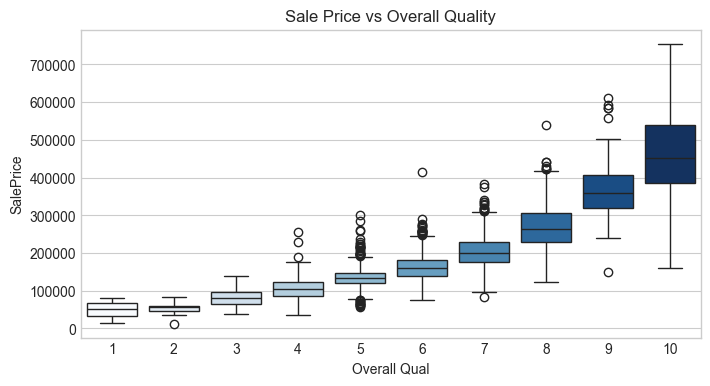

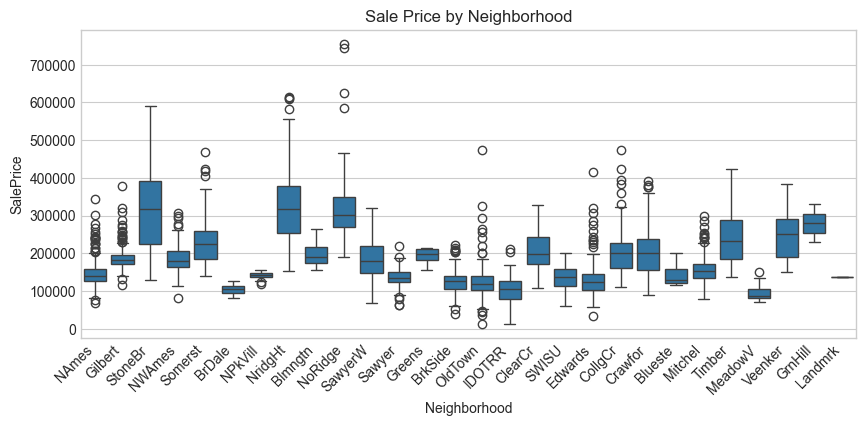

In [28]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Overall Qual', y='SalePrice', data=df, hue='Overall Qual', palette='Blues', legend=False)
plt.title("Sale Price vs Overall Quality")
plt.show()

plt.figure(figsize=(10,4))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df)
plt.xticks(rotation=45, ha='right')
plt.title("Sale Price by Neighborhood")
plt.show()

In [29]:
print("\nEDA Summary:")
print(f"- Total records: {df.shape[0]} | Total features: {df.shape[1]}")
print(f"- {len(categorical_cols)} categorical, {len(numeric_cols)} numeric features.")
print(f"- {missing.count()} features contain missing values.")
print(f"- SalePrice is right-skewed ({round(df[target].skew(),2)}).")
print("- Strongly correlated features include OverallQual, GrLivArea, and GarageCars.")


EDA Summary:
- Total records: 2930 | Total features: 82
- 43 categorical, 39 numeric features.
- 27 features contain missing values.
- SalePrice is right-skewed (1.74).
- Strongly correlated features include OverallQual, GrLivArea, and GarageCars.


In [30]:
# ============================================
# SECTION 2.2 – DATA PRE-PROCESSING AND CLEANING
# ============================================

# Check total missing values again
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing.head(10)

# Fill numeric columns with median, categorical with mode
for col in df.columns:
    if df[col].dtype == "object":
        mode_value = df[col].mode()[0]
        df[col] = df[col].fillna(mode_value)
    else:
        median_value = df[col].median()
        df[col] = df[col].fillna(median_value)

# Confirm no missing values remain
print("Remaining missing values:", df.isnull().sum().sum())

Remaining missing values: 0


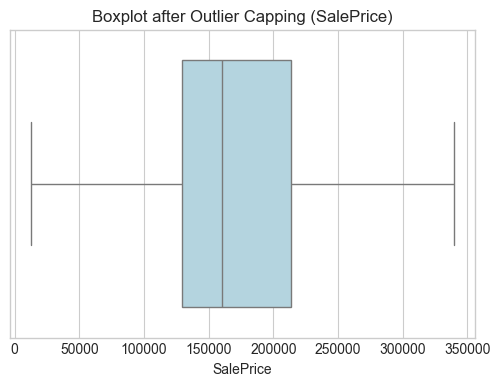

In [31]:
# Detect outliers using IQR for key numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in ["Lot Area", "Gr Liv Area", "SalePrice"]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] > upper, upper,
                np.where(df[col] < lower, lower, df[col]))

# Plot
plt.figure(figsize=(6,4))
sns.boxplot(x=df["SalePrice"], color='lightblue')
plt.title("Boxplot after Outlier Capping (SalePrice)")
plt.show()

In [32]:
# Identify categorical columns
categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

# Apply one-hot encoding for categorical features
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("New dataset shape after encoding:", df_encoded.shape)
df_encoded.head(3)

New dataset shape after encoding: (2930, 263)


Order        PID  MS SubClass  Lot Frontage  Lot Area  Overall Qual  \
0      1  526301100           20         141.0  17727.75             6   
1      2  526350040           20          80.0  11622.00             5   
2      3  526351010           20          81.0  14267.00             6   

   Overall Cond  Year Built  Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  \
0             5        1960            1960         112.0         639.0   
1             6        1961            1961           0.0         468.0   
2             6        1958            1958         108.0         923.0   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  1st Flr SF  2nd Flr SF  \
0           0.0        441.0         1080.0        1656           0   
1         144.0        270.0          882.0         896           0   
2           0.0        406.0         1329.0        1329           0   

   Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
0                0       1656.0             1.0             0.0          1   
1                0        896.0             0.0             0.0          1   
2                0       1329.0             0.0             0.0          1   

   Half Bath  Bedroom AbvGr  Kitchen AbvGr  TotRms AbvGrd  Fireplaces  \
0          0              3              1              7           2   
1          0              2              1              5           0   
2          1              3              1              6           0   

   Garage Yr Blt  Garage Cars  Garage Area  Wood Deck SF  Open Porch SF  \
0         1960.0          2.0        528.0           210             62   
1         1961.0          1.0        730.0           140              0   
2         1958.0          1.0        312.0           393             36   

   Enclosed Porch  3Ssn Porch  Screen Porch  Pool Area  Misc Val  Mo Sold  \
0               0           0             0          0         0        5   
1               0           0           120          0         0        6   
2               0           0             0          0     12500        6   

   Yr Sold  SalePrice  MS Zoning_C (all)  MS Zoning_FV  MS Zoning_I (all)  \
0     2010   215000.0              False         False              False   
1     2010   105000.0              False         False              False   
2     2010   172000.0              False         False              False   

   MS Zoning_RH  MS Zoning_RL  MS Zoning_RM  Street_Pave  Alley_Pave  \
0         False          True         False         True       False   
1          True         False         False         True       False   
2         False          True         False         True       False   

   Lot Shape_IR2  Lot Shape_IR3  Lot Shape_Reg  ...  Functional_Min2  \
0          False          False          False  ...            False   
1          False          False           True  ...            False   
2          False          False          False  ...            False   

   Functional_Mod  Functional_Sal  Functional_Sev  Functional_Typ  \
0           False           False           False            True   
1           False           False           False            True   
2           False           False           False            True   

   Fireplace Qu_Fa  Fireplace Qu_Gd  Fireplace Qu_Po  Fireplace Qu_TA  \
0            False             True            False            False   
1            False             True            False            False   
2            False             True            False            False   

   Garage Type_Attchd  Garage Type_Basment  Garage Type_BuiltIn  \
0                True                False                False   
1                True                False                False   
2                True                False                False   

   Garage Type_CarPort  Garage Type_Detchd  Garage Finish_RFn  \
0                False               False              False   
1                False               False      

In [33]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df_encoded.drop("SalePrice", axis=1)
y = df_encoded["SalePrice"]

# Apply standardization
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Check first few scaled values
X_scaled.head(3)

Order       PID  MS SubClass  Lot Frontage  Lot Area  Overall Qual  \
0 -1.731460 -0.997164    -0.877005      3.375742  2.256119     -0.067254   
1 -1.730277 -0.996904    -0.877005      0.514952  0.569699     -0.776079   
2 -1.729095 -0.996899    -0.877005      0.561850  1.300253     -0.067254   

   Overall Cond  Year Built  Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  \
0     -0.506718   -0.375537       -1.163488      0.061046      0.431223   
1      0.393091   -0.342468       -1.115542     -0.566039      0.055760   
2      0.393091   -0.441674       -1.259380      0.038650      1.054800   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  1st Flr SF  2nd Flr SF  \
0     -0.293918    -0.269105       0.064492    1.267003   -0.783185   
1      0.557582    -0.658319      -0.385032   -0.672643   -0.783185   
2     -0.293918    -0.348769       0.629802    0.432445   -0.783185   

   Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
0        -0.101005     0.355697        1.084376        -0.24922  -1.024793   
1        -0.101005    -1.267407       -0.821576        -0.24922  -1.024793   
2        -0.101005    -0.342665       -0.821576        -0.24922  -1.024793   

   Half Bath  Bedroom AbvGr  Kitchen AbvGr  TotRms AbvGrd  Fireplaces  \
0  -0.755203       0.176094      -0.207291       0.354167    2.162180   
1  -0.755203      -1.032234      -0.207291      -0.917535   -0.925143   
2   1.234675       0.176094      -0.207291      -0.281684   -0.925143   

   Garage Yr Blt  Garage Cars  Garage Area  Wood Deck SF  Open Porch SF  \
0      -0.732384     0.306589     0.256673      0.920121       0.214409   
1      -0.692098    -1.008648     1.196325      0.366061      -0.704493   
2      -0.812957    -1.008648    -0.748103      2.368594      -0.170937   

   Enclosed Porch  3Ssn Porch  Screen Porch  Pool Area   Misc Val   Mo Sold  \
0       -0.358838   -0.103134     -0.285354  -0.063031  -0.089422 -0.448057   
1       -0.358838   -0.103134      1.854530  -0.063031  -0.089422 -0.079602   
2       -0.358838   -0.103134     -0.285354  -0.063031  21.985725 -0.079602   

    Yr Sold  MS Zoning_C (all)  MS Zoning_FV  MS Zoning_I (all)  MS Zoning_RH  \
0  1.678499          -0.092768     -0.223166          -0.026135     -0.096440   
1  1.678499          -0.092768     -0.223166          -0.026135     10.369114   
2  1.678499          -0.092768     -0.223166          -0.026135     -0.096440   

   MS Zoning_RL  MS Zoning_RM  Street_Pave  Alley_Pave  Lot Shape_IR2  \
0      0.537629     -0.432662     0.064128   -0.165376      -0.163185   
1     -1.860018     -0.432662     0.064128   -0.165376      -0.163185   
2      0.537629     -0.432662     0.064128   -0.165376      -0.163185   

   Lot Shape_IR3  Lot Shape_Reg  Land Contour_HLS  ...  Functional_Min2  \
0      -0.074099      -1.317483         -0.206651  ...        -0.156447   
1      -0.074099       0.759023         -0.206651  ...        -0.156447   
2      -0.074099      -1.317483         -0.206651  ...        -0.156447   

   Functional_Mod  Functional_Sal  Functional_Sev  Functional_Typ  \
0       -0.109954       -0.026135       -0.026135        0.272116   
1       -0.109954       -0.026135       -0.026135        0.272116   
2       -0.109954       -0.026135       -0.026135        0.272116   

   Fireplace Qu_Fa  Fireplace Qu_Gd  Fireplace Qu_Po  Fireplace Qu_TA  \
0        -0.162079         0.593906        -0.126294        -0.507455   
1        -0.162079         0.593906        -0.126294        -0.507455   
2        -0.162079         0.593906        -0.126294        -0.507455   

   Garage Type_Attchd  Garage Type_Basment  Garage Type_BuiltIn  \
0            0.742904            -0.111533            -0.260354   
1            0.742904            -0.111533            -0.260354   
2            0.742904            -0.111533            -0.260354   

   Garage Type_CarPort  Garage Type_Detchd  Garage Finish_RFn  \
0            -0.071734           -0.603374          -0.619177   
1  

In [34]:
# Combine scaled features and target for later use
cleaned_df = pd.concat([X_scaled, y], axis=1)

# Save to new CSV
cleaned_df.to_csv("AmesHousing_Cleaned.csv", index=False)
print("Cleaned dataset saved successfully!")

Cleaned dataset saved successfully!


In [35]:
# ============================================
# SECTION 2.3 – FEATURE ENGINEERING
# ============================================

from lightgbm import LGBMRegressor

# Load the cleaned dataset produced in Section 2.2
df_encoded = pd.read_csv("AmesHousing_Cleaned.csv")

print("Loaded cleaned dataset:", df_encoded.shape)
df_encoded.head(3)

Loaded cleaned dataset: (2930, 263)


Order       PID  MS SubClass  Lot Frontage  Lot Area  Overall Qual  \
0 -1.731460 -0.997164    -0.877005      3.375742  2.256119     -0.067254   
1 -1.730277 -0.996904    -0.877005      0.514952  0.569699     -0.776079   
2 -1.729095 -0.996899    -0.877005      0.561850  1.300253     -0.067254   

   Overall Cond  Year Built  Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  \
0     -0.506718   -0.375537       -1.163488      0.061046      0.431223   
1      0.393091   -0.342468       -1.115542     -0.566039      0.055760   
2      0.393091   -0.441674       -1.259380      0.038650      1.054800   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  1st Flr SF  2nd Flr SF  \
0     -0.293918    -0.269105       0.064492    1.267003   -0.783185   
1      0.557582    -0.658319      -0.385032   -0.672643   -0.783185   
2     -0.293918    -0.348769       0.629802    0.432445   -0.783185   

   Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
0        -0.101005     0.355697        1.084376        -0.24922  -1.024793   
1        -0.101005    -1.267407       -0.821576        -0.24922  -1.024793   
2        -0.101005    -0.342665       -0.821576        -0.24922  -1.024793   

   Half Bath  Bedroom AbvGr  Kitchen AbvGr  TotRms AbvGrd  Fireplaces  \
0  -0.755203       0.176094      -0.207291       0.354167    2.162180   
1  -0.755203      -1.032234      -0.207291      -0.917535   -0.925143   
2   1.234675       0.176094      -0.207291      -0.281684   -0.925143   

   Garage Yr Blt  Garage Cars  Garage Area  Wood Deck SF  Open Porch SF  \
0      -0.732384     0.306589     0.256673      0.920121       0.214409   
1      -0.692098    -1.008648     1.196325      0.366061      -0.704493   
2      -0.812957    -1.008648    -0.748103      2.368594      -0.170937   

   Enclosed Porch  3Ssn Porch  Screen Porch  Pool Area   Misc Val   Mo Sold  \
0       -0.358838   -0.103134     -0.285354  -0.063031  -0.089422 -0.448057   
1       -0.358838   -0.103134      1.854530  -0.063031  -0.089422 -0.079602   
2       -0.358838   -0.103134     -0.285354  -0.063031  21.985725 -0.079602   

    Yr Sold  MS Zoning_C (all)  MS Zoning_FV  MS Zoning_I (all)  MS Zoning_RH  \
0  1.678499          -0.092768     -0.223166          -0.026135     -0.096440   
1  1.678499          -0.092768     -0.223166          -0.026135     10.369114   
2  1.678499          -0.092768     -0.223166          -0.026135     -0.096440   

   MS Zoning_RL  MS Zoning_RM  Street_Pave  Alley_Pave  Lot Shape_IR2  \
0      0.537629     -0.432662     0.064128   -0.165376      -0.163185   
1     -1.860018     -0.432662     0.064128   -0.165376      -0.163185   
2      0.537629     -0.432662     0.064128   -0.165376      -0.163185   

   Lot Shape_IR3  Lot Shape_Reg  Land Contour_HLS  ...  Functional_Mod  \
0      -0.074099      -1.317483         -0.206651  ...       -0.109954   
1      -0.074099       0.759023         -0.206651  ...       -0.109954   
2      -0.074099      -1.317483         -0.206651  ...       -0.109954   

   Functional_Sal  Functional_Sev  Functional_Typ  Fireplace Qu_Fa  \
0       -0.026135       -0.026135        0.272116        -0.162079   
1       -0.026135       -0.026135        0.272116        -0.162079   
2       -0.026135       -0.026135        0.272116        -0.162079   

   Fireplace Qu_Gd  Fireplace Qu_Po  Fireplace Qu_TA  Garage Type_Attchd  \
0         0.593906        -0.126294        -0.507455            0.742904   
1         0.593906        -0.126294        -0.507455            0.742904   
2         0.593906        -0.126294        -0.507455            0.742904   

   Garage Type_Basment  Garage Type_BuiltIn  Garage Type_CarPort  \
0            -0.111533            -0.260354            -0.071734   
1            -0.111533            -0.260354            -0.071734   
2            -0.111533            -0.260354            -0.071734   

   Garage Type_Detchd  Garage Finish_RFn  Garage Finish_Unf  Garage Qual_Fa  \
0           -0.603374          -0.6191

In [36]:
# Create new numerical features from existing columns
df_encoded["TotalSF"] = df_encoded["Total Bsmt SF"] + df_encoded["Gr Liv Area"]
df_encoded["TotalBath"] = (
    df_encoded.get("Full Bath", 0)
    + 0.5 * df_encoded.get("Half Bath", 0)
    + df_encoded.get("Bsmt Full Bath", 0)
    + 0.5 * df_encoded.get("Bsmt Half Bath", 0)
)
df_encoded["AgeOfHouse"] = 2025 - df_encoded["Year Built"]

# Verify creation
df_encoded[["TotalSF", "TotalBath", "AgeOfHouse"]].head()

TotalSF  TotalBath   AgeOfHouse
0  0.420189  -0.442629  2025.375537
1 -1.652439  -2.348580  2025.342468
2  0.287137  -1.353641  2025.441674
3  3.728212   2.361131  2025.110988
4  0.017437   0.455180  2024.152000

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003080 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4876
[LightGBM] [Info] Number of data points in the train set: 2930, number of used features: 189
[LightGBM] [Info] Start training from score 177082.283959


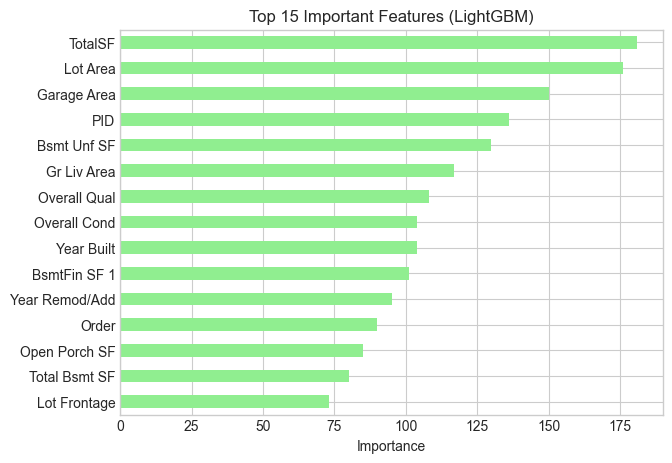

In [37]:
# Split features and target
X = df_encoded.drop("SalePrice", axis=1)
y = df_encoded["SalePrice"]

# Train LightGBM
lgb = LGBMRegressor(random_state=42)
lgb.fit(X, y)

# Feature importance plot
importance = pd.Series(lgb.feature_importances_, index=X.columns).sort_values(ascending=False)
importance.head(15).plot(kind='barh', figsize=(7,5), color='lightgreen')
plt.title("Top 15 Important Features (LightGBM)")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.show()

In [38]:
# Select top 20 most important predictors
selected_features = importance.head(20).index.tolist()
X_selected = df_encoded[selected_features]
y = df_encoded["SalePrice"]

# Print selected features 5 per row
print("Selected features for modelling:")
for i in range(0, len(selected_features), 5):
    row = selected_features[i:i+5]
    print(", ".join(row))

print("\nX_selected shape:", X_selected.shape)

Selected features for modelling:
TotalSF, Lot Area, Garage Area, PID, Bsmt Unf SF
Gr Liv Area, Overall Qual, Overall Cond, Year Built, BsmtFin SF 1
Year Remod/Add, Order, Open Porch SF, Total Bsmt SF, Lot Frontage
1st Flr SF, TotalBath, 2nd Flr SF, Mas Vnr Area, Garage Yr Blt

X_selected shape: (2930, 20)


In [39]:
# ============================================
# SECTION 2.4 – MODEL IMPLEMENTATION
# ============================================

from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define target and features
target = "SalePrice"
X = df_encoded.drop(target, axis=1)
y = df_encoded[target]

# Split data (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train size:", X_train.shape, "| Test size:", X_test.shape)

Train size: (2344, 265) | Test size: (586, 265)


In [40]:
# Initialize Elastic Net model
en_model = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
en_model.fit(X_train, y_train)

# Predictions
y_pred_en = en_model.predict(X_test)

# Evaluate performance
mae_en = mean_absolute_error(y_test, y_pred_en)
rmse_en = np.sqrt(mean_squared_error(y_test, y_pred_en))
r2_en = r2_score(y_test, y_pred_en)

print(f"Elastic Net → MAE: {mae_en:.2f}, RMSE: {rmse_en:.2f}, R²: {r2_en:.3f}")

Elastic Net → MAE: 13255.35, RMSE: 19113.78, R²: 0.931


In [41]:
# Initialize LightGBM model
lgb_model = LGBMRegressor(random_state=42, n_estimators=300, learning_rate=0.05)
lgb_model.fit(X_train, y_train)

# Predictions
y_pred_lgb = lgb_model.predict(X_test)

# Evaluate performance
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))
r2_lgb = r2_score(y_test, y_pred_lgb)

print(f"LightGBM → MAE: {mae_lgb:.2f}, RMSE: {rmse_lgb:.2f}, R²: {r2_lgb:.3f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001944 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4775
[LightGBM] [Info] Number of data points in the train set: 2344, number of used features: 184
[LightGBM] [Info] Start training from score 175384.102816
LightGBM → MAE: 11635.43, RMSE: 16637.02, R²: 0.948


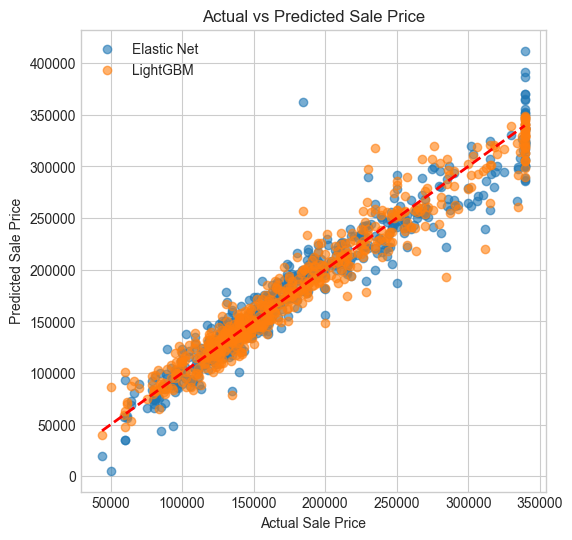

In [42]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_en, alpha=0.6, label="Elastic Net")
plt.scatter(y_test, y_pred_lgb, alpha=0.6, label="LightGBM")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted Sale Price")
plt.legend()
plt.show()

In [43]:
# ============================================
# SECTION 2.5 – MODEL TUNING AND OPTIMIZATION
# ============================================

from sklearn.model_selection import GridSearchCV

# Define parameter grid for Elastic Net
param_grid_en = {
    'alpha': [0.01, 0.1, 1, 10],
    'l1_ratio': [0.1, 0.5, 0.9]
}

# Initialize model
en = ElasticNet(random_state=42)

# Perform 5-fold cross-validation grid search
grid_en = GridSearchCV(
    estimator=en,
    param_grid=param_grid_en,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=1
)
grid_en.fit(X_train, y_train)

# Display best parameters and score
print("Best ElasticNet parameters:", grid_en.best_params_)
print("Best cross-validated R²:", grid_en.best_score_)

# Evaluate on test set
best_en = grid_en.best_estimator_
y_pred_en_tuned = best_en.predict(X_test)

mae_en_tuned = mean_absolute_error(y_test, y_pred_en_tuned)
rmse_en_tuned = np.sqrt(mean_squared_error(y_test, y_pred_en_tuned))
r2_en_tuned = r2_score(y_test, y_pred_en_tuned)

print(f"Tuned Elastic Net → MAE: {mae_en_tuned:.2f}, RMSE: {rmse_en_tuned:.2f}, R²: {r2_en_tuned:.3f}")


Fitting 5 folds for each of 12 candidates, totalling 60 fits


/Users/ameliadavid/App/MachineLearning/venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.665e+11, tolerance: 8.257e+08
  model = cd_fast.enet_coordinate_descent(
/Users/ameliadavid/App/MachineLearning/venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.610e+11, tolerance: 8.365e+08
  model = cd_fast.enet_coordinate_descent(
/Users/ameliadavid/App/MachineLearning/venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

Best ElasticNet parameters: {'alpha': 0.1, 'l1_ratio': 0.5}
Best cross-validated R²: 0.8875471784149582
Tuned Elastic Net → MAE: 13255.35, RMSE: 19113.78, R²: 0.931


In [44]:
# Parameter grid for LightGBM
param_grid_lgb = {
    'num_leaves': [20, 31, 40],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [200, 400, 600],
    'max_depth': [6, 8, 10]
}

lgb = LGBMRegressor(random_state=42)

grid_lgb = GridSearchCV(
    estimator=lgb,
    param_grid=param_grid_lgb,
    scoring='r2',
    cv=3,
    n_jobs=-1,
    verbose=1
)
grid_lgb.fit(X_train, y_train)

print("Best LightGBM parameters:", grid_lgb.best_params_)
print("Best cross-validated R²:", grid_lgb.best_score_)

# Evaluate best model
best_lgb = grid_lgb.best_estimator_
y_pred_lgb_tuned = best_lgb.predict(X_test)

mae_lgb_tuned = mean_absolute_error(y_test, y_pred_lgb_tuned)
rmse_lgb_tuned = np.sqrt(mean_squared_error(y_test, y_pred_lgb_tuned))
r2_lgb_tuned = r2_score(y_test, y_pred_lgb_tuned)

print(f"Tuned LightGBM → MAE: {mae_lgb_tuned:.2f}, RMSE: {rmse_lgb_tuned:.2f}, R²: {r2_lgb_tuned:.3f}")

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016120 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4475
[LightGBM] [Info] Number of data point

In [45]:
results = pd.DataFrame({
    'Model': ['ElasticNet (Tuned)', 'LightGBM (Tuned)'],
    'MAE': [mae_en_tuned, mae_lgb_tuned],
    'RMSE': [rmse_en_tuned, rmse_lgb_tuned],
    'R²': [r2_en_tuned, r2_lgb_tuned]
})
print(results)

                Model           MAE          RMSE        R²
0  ElasticNet (Tuned)  13255.346783  19113.782767  0.931445
1    LightGBM (Tuned)  11179.248617  15766.588667  0.953353


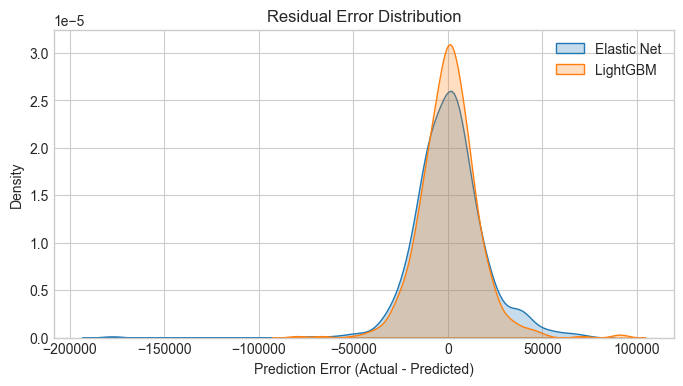

In [46]:
# Compute residuals for both models
residuals_en = y_test - y_pred_en_tuned
residuals_lgb = y_test - y_pred_lgb_tuned

# Plot residual distributions
plt.figure(figsize=(8,4))
sns.kdeplot(residuals_en, label='Elastic Net', fill=True)
sns.kdeplot(residuals_lgb, label='LightGBM', fill=True)
plt.title("Residual Error Distribution")
plt.xlabel("Prediction Error (Actual - Predicted)")
plt.legend()
plt.show()

In [47]:
from sklearn.model_selection import cross_val_score

cv_en = cross_val_score(best_en, X, y, scoring='r2', cv=5)
cv_lgb = cross_val_score(best_lgb, X, y, scoring='r2', cv=5)

print("Elastic Net CV R² scores:", cv_en)
print("LightGBM CV R² scores:", cv_lgb)

print("\nMean CV R²:")
print("Elastic Net:", cv_en.mean())
print("LightGBM:", cv_lgb.mean())

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027486 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4778
[LightGBM] [Info] Number of data points in the train set: 2344, number of used features: 186
[LightGBM] [Info] Start training from score 174207.212884
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

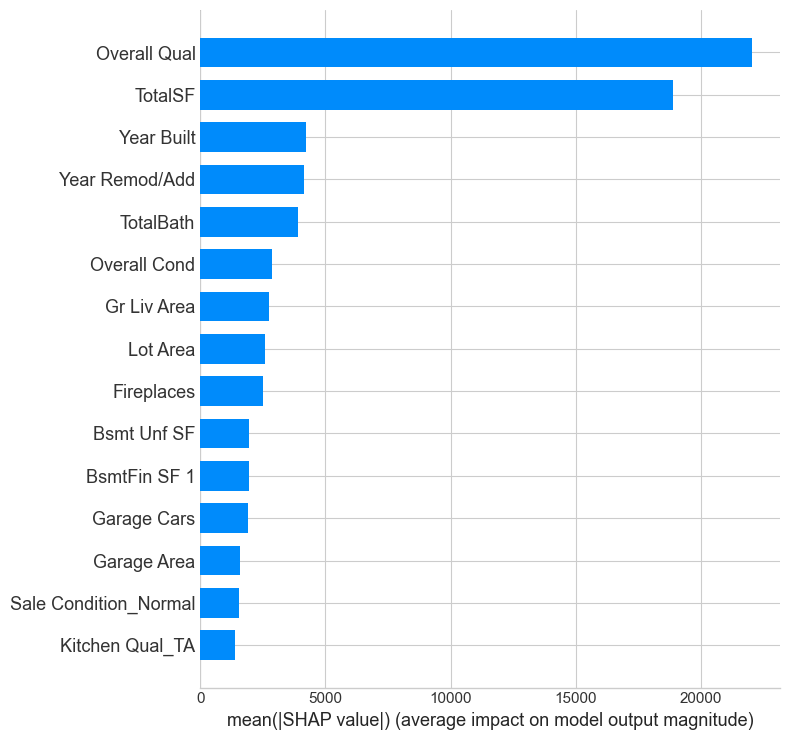

In [48]:
# ============================================
# SECTION 2.7 – MODEL EXPLAINABILITY
# ============================================

import shap

# Create SHAP explainer for the tuned LightGBM model
explainer = shap.TreeExplainer(best_lgb)
shap_values = explainer.shap_values(X)

# Generate SHAP summary bar plot for top features
shap.summary_plot(shap_values, X, plot_type="bar", max_display=15)


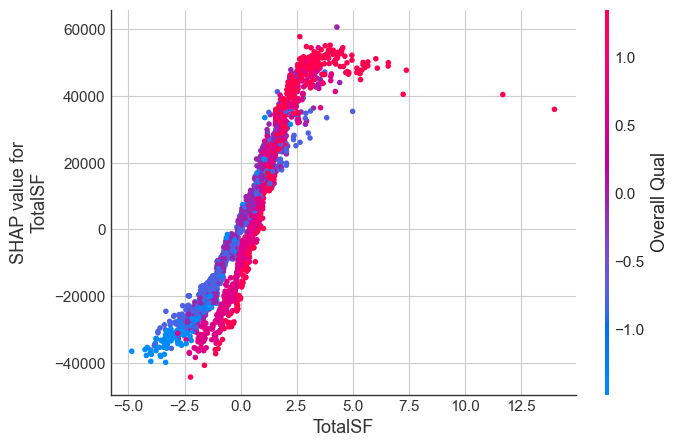

In [49]:
# Visualize how TotalSF affects the predicted SalePrice
shap.dependence_plot("TotalSF", shap_values, X)

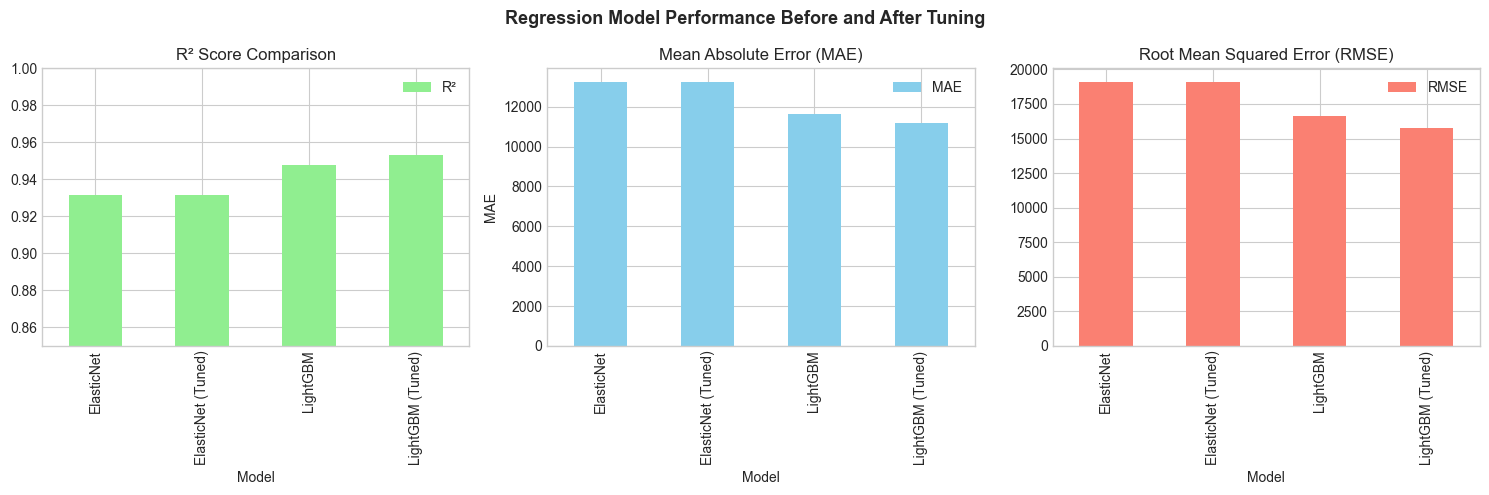

In [ ]:
# ============================================
# SECTION 4.1 – REGRESSION METRIC COMPARISON (BEFORE VS AFTER TUNING)
# ============================================

metrics_reg = pd.DataFrame({
    'Model': ['ElasticNet', 'ElasticNet (Tuned)', 'LightGBM', 'LightGBM (Tuned)'],
    'R²': [r2_en, r2_en_tuned, r2_lgb, r2_lgb_tuned],
    'MAE': [mae_en, mae_en_tuned, mae_lgb, mae_lgb_tuned],
    'RMSE': [rmse_en, rmse_en_tuned, rmse_lgb, rmse_lgb_tuned]
})

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

metrics_reg.plot(x='Model', y='R²', kind='bar', color='lightgreen', ax=axes[0])
axes[0].set_title('R² Score Comparison')
axes[0].set_ylim(0.85, 1.0)

metrics_reg.plot(x='Model', y='MAE', kind='bar', color='skyblue', ax=axes[1])
axes[1].set_title('Mean Absolute Error (MAE)')
axes[1].set_ylabel('MAE')

metrics_reg.plot(x='Model', y='RMSE', kind='bar', color='salmon', ax=axes[2])
axes[2].set_title('Root Mean Squared Error (RMSE)')

plt.suptitle('Regression Model Performance Before and After Tuning', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

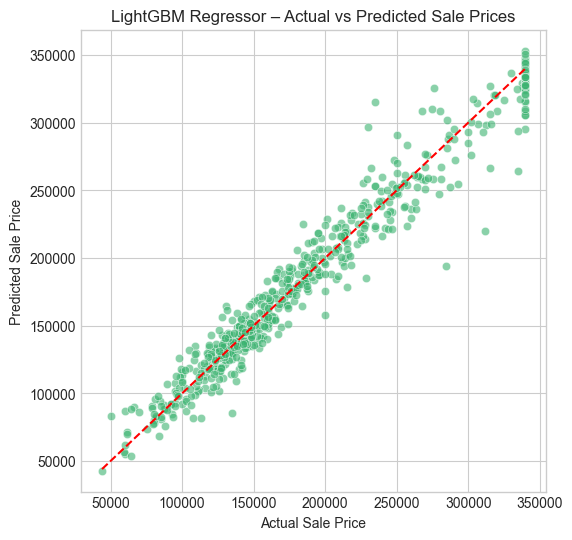

In [53]:
# ============================================
# SECTION 4.1 – REGRESSION ACTUAL VS PREDICTED
# ============================================

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_lgb_tuned, alpha=0.6, color='mediumseagreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('LightGBM Regressor – Actual vs Predicted Sale Prices')
plt.show()